<a href="https://colab.research.google.com/github/Shahwar-shk/Temperature-Forecasting-Using-ARIMA-Prophet/blob/main/Temp_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving temperature.csv to temperature.csv


In [2]:
import pandas as pd

# Load data
df_temp = pd.read_csv("temperature.csv")

# Reshape from wide to long format
df_long = df_temp.melt(id_vars="datetime", var_name="city", value_name="temperature")

# Convert datetime column to actual datetime type
df_long['datetime'] = pd.to_datetime(df_long['datetime'])

# Filter for one city, e.g., San Francisco
city_df = df_long[df_long["city"] == "San Francisco"].copy()

# Rename columns for Prophet format
city_df = city_df.rename(columns={"datetime": "ds", "temperature": "y"})

# Drop NA values
city_df.dropna(inplace=True)

city_df.head()


,ds,city,y
90507,2012-10-01 13:00:00,San Francisco,289.480000
90508,2012-10-01 14:00:00,San Francisco,289.474993
90509,2012-10-01 15:00:00,San Francisco,289.460618
90510,2012-10-01 16:00:00,San Francisco,289.446243
90511,2012-10-01 17:00:00,San Francisco,289.431869


In [3]:
pip install prophet


In [4]:
from prophet import Prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcqt4iifi/05kx9l4o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcqt4iifi/bm_ilpmh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92977', 'data', 'file=/tmp/tmpcqt4iifi/05kx9l4o.json', 'init=/tmp/tmpcqt4iifi/bm_ilpmh.json', 'output', 'file=/tmp/tmpcqt4iifi/prophet_modelkdd9s502/prophet_model-20250405070903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


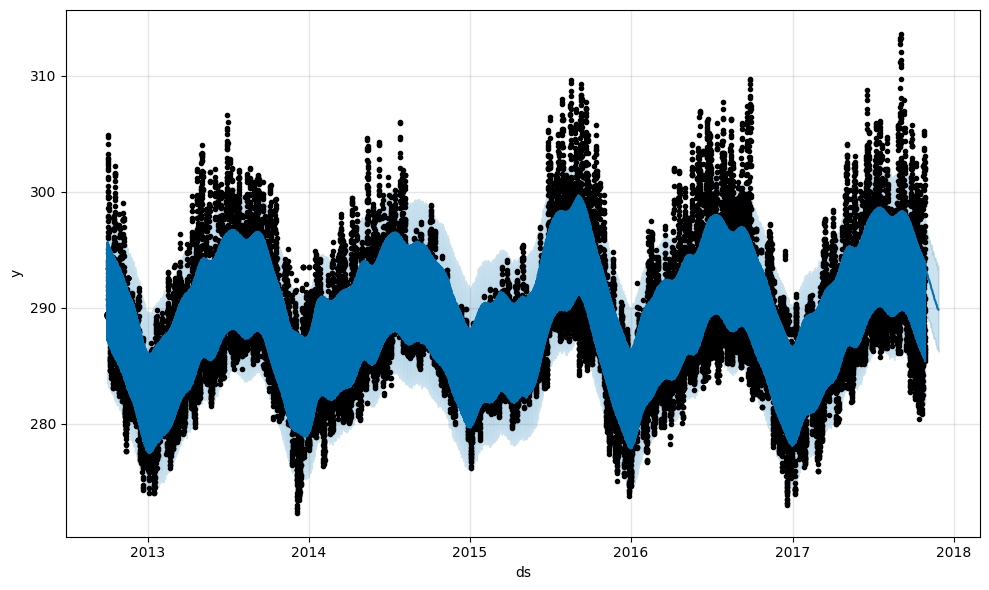

In [5]:
# Initialize and fit model
model = Prophet()
model.fit(city_df)

# Create future dataframe – forecasting next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)


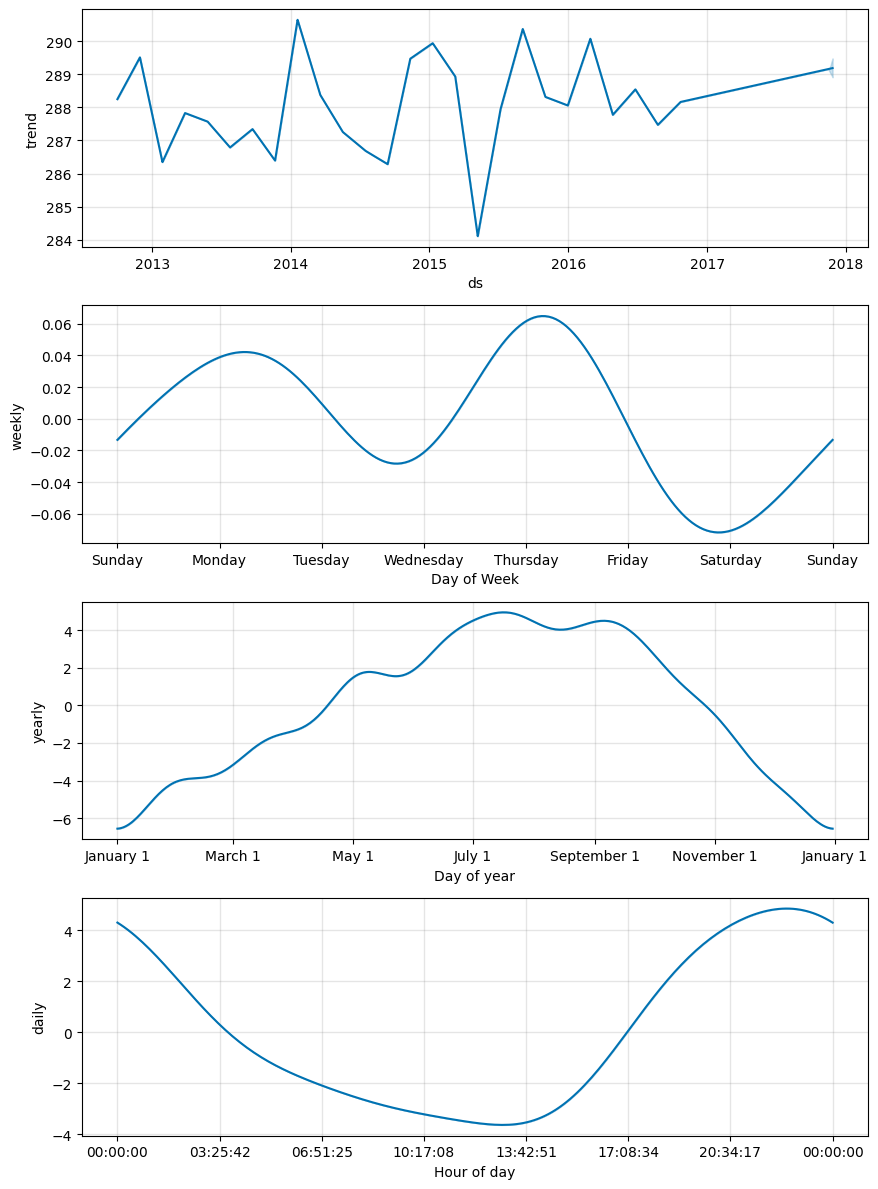

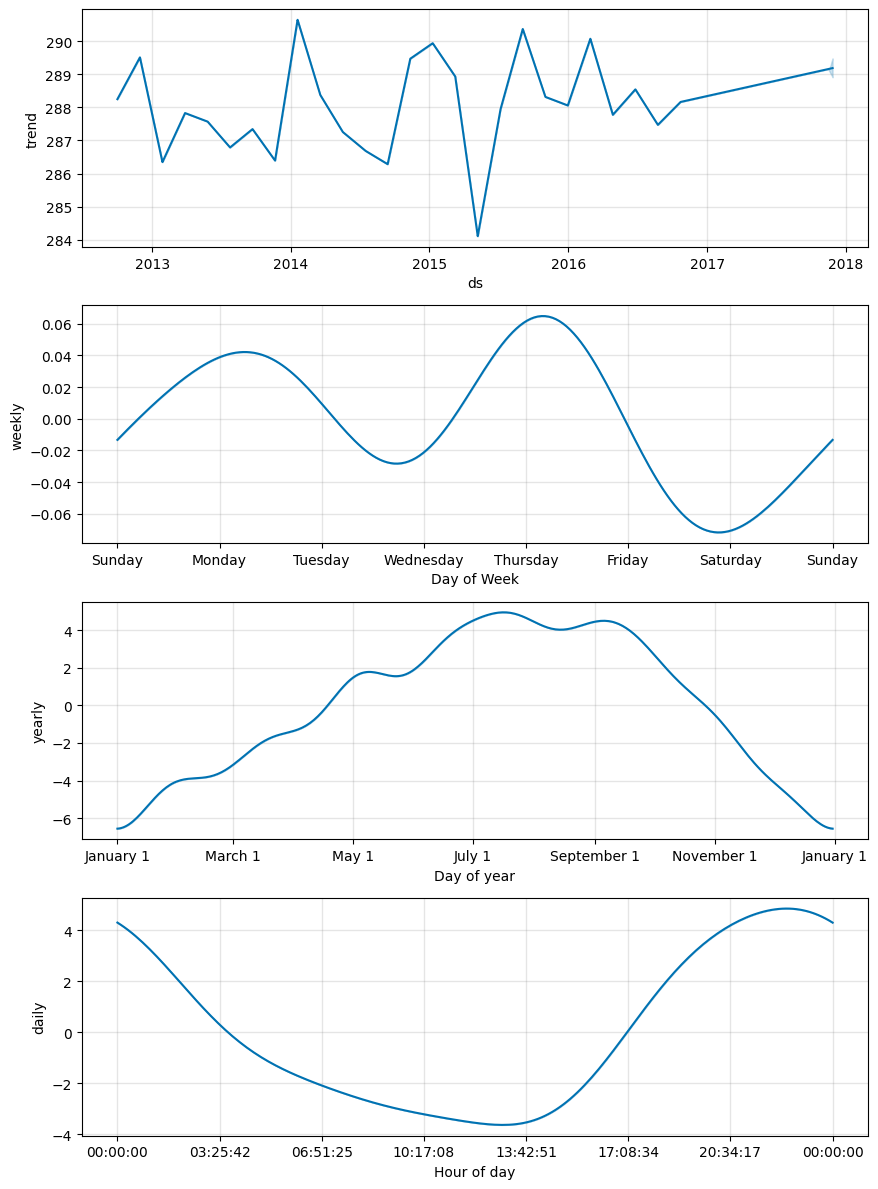

In [6]:
model.plot_components(forecast)


In [7]:
pip install statsmodels


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


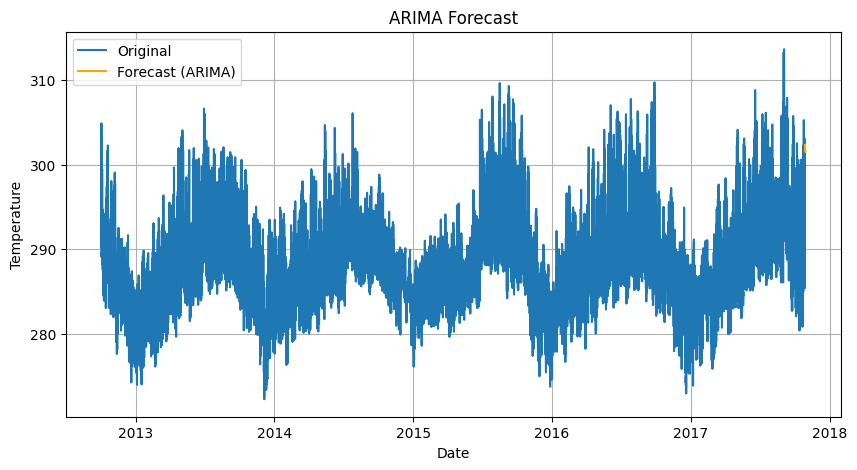

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare the data
city_df_arima = city_df.set_index('ds')
city_df_arima.index = pd.to_datetime(city_df_arima.index)
city_df_arima = city_df_arima['y']  # just the temperature series

# Fit ARIMA model (order can be tuned)
model_arima = ARIMA(city_df_arima, order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast next 30 days
forecast_arima = model_arima_fit.forecast(steps=30)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(city_df_arima, label='Original')
plt.plot(forecast_arima, label='Forecast (ARIMA)', color='orange')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()
